# SciPy - Scientific algorithms collection for Python



## Introduction

SciPy package adds features to the low level algorithms of NumPy for multidimensional arrays, and provides many high level algorithms of scientific use. 

Some of the topics covered by SciPy are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transform ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Eigenvalues of sparse matrix ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Input/Ouput from/to files ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))


<div class = "alert alert-warning">
Note that this is called Appendix because it contains additional material. You can check this notebook now or you can come back later. Scipy package will be used in some examples later, but for the introductory part is not needed. </div>

**Table of contents:**

* [Integration](#Integration)
* [Linear Algebra](#Linear-Algebra)
* [Optimization](#Optimization)
* [Statistics](#Statistics)
* [Linear regresions](#Linear-regresions)

Each of the submodules provide many functions and classes that can be used to solve problems in their respective topics. To access the SciPy package in a Python script, we start by importing everything from the module `scipy`.

In [1]:
import scipy as sp 

If we only need to use part of SciPy routines, we can selectively include only those modules we are interested in. For instance, to include the linear algebra package under the name `la`, we can include:

In [10]:
import scipy.linalg as la

## Integration

### Numerical integration: Quadratures

The numerical evaluation of a function like

$\displaystyle \int_a^b f(x) dx$

is calles *numerica quadrature*, or simply *quadrature*. SciPy provides functions for different quadrature types, for instance, the functions `quad`, `dblquad` y `tplquad` to calculate simple integrals, doubles or triples, respectively.

In [3]:
from scipy.integrate import quad, dblquad, tplquad

The function `quad` accept many optional arguments, that can be used to fit details of the behaviour of the function (enter `help(quad)` for more details).

The basic use is the following:

In [4]:
# define a simple function to be integrated
def f(x,b):
    return b*x**2

In [5]:
x_inf = 0 # lower limit of x
x_sup = 2 # upper limit of x

val, abserr = quad(f, x_inf, x_sup, args=(5.,))

print("integral value =", val, ", absolute error =", abserr)

integral value = 13.333333333333332 , absolute error = 1.4802973661668753e-13


If we need to include extra arguments in the integrating function, then we can use the arguement `args`:

In [6]:
# zeros of Bessel funciton 
n = 3 # order
m = 2 # number of roots to calculate
jn_zeros(n, m)

NameError: name 'jn_zeros' is not defined

In [8]:
def integrating(x, n):
    """
    Bessel functions of first kind and order n. 
    """
    return jn(n, x)


x_inf = 0 # lower limit of x
x_sup = 6.38 # upper limit of x

val, abserr = quad(integrating, x_inf, x_sup, args=(3,)) # evaluates integral with n=3

print(val, abserr)

NameError: name 'jn' is not defined

For simple functions we can use the lambda function instead of explicitely defining a function for the integrated part:

In [12]:
import numpy as np
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf) # Inf = infinite!

print("Numerical result  =", val, abserr)

analytic = np.sqrt(np.pi)
print("Analytical result =", analytic)

Numerical result  = 1.7724538509055159 1.4202636780944923e-08
Analytical result = 1.7724538509055159


As shown in this example, we can use 'Inf' and '-Inf' as integral limits.

Higher dimension integrals are evaluated in a similar way:

In [13]:
def integrated(x, y):
    return np.exp(-x**2-y**2)

x_low = 0  
x_upp = 10
y_low = 0
y_upp = 10



In [14]:
val, abserr = dblquad(integrated, x_low, x_upp, lambda x : y_low, lambda x: y_upp)

print(val, abserr)

0.7853981633974476 1.3753098510218528e-08


Note how we require to incorporate lambda functions for the integration limits in y, since these limits can in general be functions of x.

## Linear Algebra

The linear algebra module contains many functions related to matrix, including linear equations resolutions, eigenvalues calculation, matrix functions (for instance, for matrix expontials), several different decompositions (SVD, LU, cholesky), etc.

A detailed documentation is available here: http://docs.scipy.org/doc/scipy/reference/linalg.html

We will see how to use some of these functions:

#### Linear equations systems

Linear equations systems as

$A x = b$

where $A$ is a matrix and $x,b$ are vectors, can be resolved in the following way:

In [15]:
from scipy import linalg

A = np.array([[1,2,3], [4,12,6], [7,8,9]])
b = np.array([4,2,10])

In [16]:
x = linalg.solve(A, b)
x

array([-0.14285714, -0.71428571,  1.85714286])

In [17]:
# we verify the solution
np.dot(A, x) - b

array([0.0000000e+00, 8.8817842e-16, 0.0000000e+00])

We can also do the same with

$A X = B$,

where now $A, B$ and $X$ are matrix:

In [18]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [19]:
X = linalg.solve(A, B)

In [20]:
X

array([[ 0.63280229, -0.60157722,  1.4586207 ],
       [-0.41380413,  2.53954976,  4.50531619],
       [ 1.42240049, -0.62903879, -4.26278743]])

In [21]:
# we verify the solution
np.dot(A, X) - B

array([[ 1.66533454e-16,  5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00, -2.22044605e-16, -2.22044605e-16],
       [ 0.00000000e+00,  2.77555756e-17,  2.77555756e-16]])

#### Eigenvalues and eigenvectors

The eigenvalues problem for the matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$,

where $v_n$ is the $n$-th eigenvector and $\lambda_n$ is the $n$-th eigenvalue.

To calculate the eigenvectors of a matrix we use `eigvals` and to calculate eigenvalues and eigenvectors we can use the function `eig`:

In [22]:
evals = linalg.eigvals(A)

In [23]:
evals[0]

(0.12831599506408925+0.07461086555208299j)

In [24]:
evals, evecs = linalg.eig(A)

In [25]:
evals

array([0.128316  +0.07461087j, 0.128316  -0.07461087j,
       0.96094796+0.j        ])

In [26]:
evecs

array([[ 0.00484609+0.19414058j,  0.00484609-0.19414058j,
        -0.54329366+0.j        ],
       [-0.65284423-0.16821869j, -0.65284423+0.16821869j,
        -0.4297337 +0.j        ],
       [ 0.71258882+0.j        ,  0.71258882-0.j        ,
        -0.72122184+0.j        ]])

The eigenvectors corresponding to the $n$-th eigenvalue (saved in `evals[n]`) is the $n$-th *column* in `evecs`, that is to say, `evecs[:,n]`. To verify it, let's try to multiply the eigenvectors with the matrix and then compare the results with the product of the eigenvector and eigenvalue:

In [27]:
n = 1

np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n]

array([9.54097912e-17-3.46944695e-18j, 1.11022302e-16-1.38777878e-17j,
       1.24900090e-16-2.08166817e-17j])

#### Matrix operations

In [28]:
# inverse matrix
linalg.inv(A)

array([[  3.94833385,  -2.0672935 ,  -0.95857668],
       [  7.15281144,   0.93636675,  -5.32605578],
       [-10.62576206,   2.082401  ,   7.80420469]])

In [29]:
# determinant
linalg.det(A)

0.021171390062028443

In [30]:
# matrix norm
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(0.9859295405533542, 1.2083197322286425)

## Optimization

The optimization (finding a function maximmum or minimum) constitutes a very wide field in maths, and the complicated functions optimization or of many variables can be complicated. Here we will only check some very simple cases. For a detailed introduction to SciPy optimization, see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module of Scipy we have to import the module `optimize`:

In [31]:
from scipy import optimize

### Finding minimums

Let's see first how to find the minimum of a simple function of one variable:

In [32]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

<IPython.core.display.Javascript object>


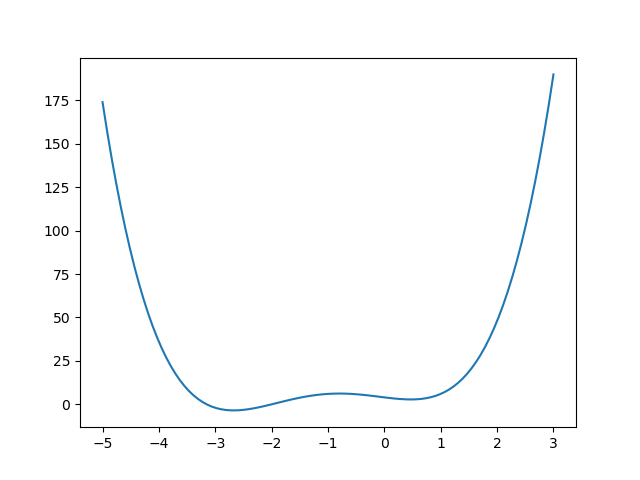

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(-5, 3, 100)
plt.plot(x, f(x))

We can use the function `fmin_bfgs` to find the function minimum:

In [35]:
x_min = optimize.fmin_bfgs(f, -2) # look for a local minimum close to -2
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [36]:
optimize.fmin_bfgs(f, 0.5)  # look for a local minimum close to 0.5

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

We can also use the functions `brent` o `fminbound`. These functions have a different syntax and use different algorithms.

In [37]:
optimize.brent(f)

0.46961743402759754

In [38]:
optimize.fminbound(f, -4, 2)  # look for the minimum in the range (-4,2)

-2.6729822917513886

### Finding function roots

To find the solutions of an equation with the form $f(x) = 0$ we can use the function `fsolve`, which requires to specify an initial point: 

In [39]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

Let's first plot the function ...

<IPython.core.display.Javascript object>


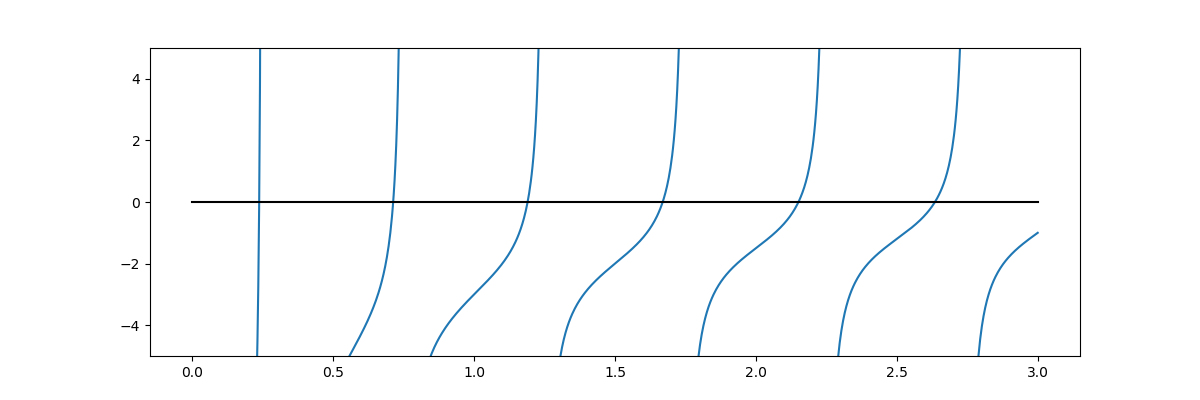

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
fig, ax  = plt.subplots(figsize=(12,4))
x = np.linspace(0, 3.0, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.NaN # delete vertical lines when the function change sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [143]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [42]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [43]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Statistics

The module `scipy.stats` contains several statistical distributions, statistical functions. For a complete documentation of these features, see [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

There is also a very powerful Python package for statistical modeling called statsmodels. See [http://statsmodels.sourceforge.net](http://statsmodels.sourceforge.net) for more details.

In [44]:
from scipy import stats

creates a random variable (discrete) with a poisson distribution

$P(k) = \frac{\mu^k e^{\mu}}{k!}$


In [45]:

X = stats.poisson(3.5) # mu = 2.5  (average goals in a championship)
X.pmf(1)  # Probability of 0 goals en one match of the championship.


0.10569084197811476

<IPython.core.display.Javascript object>


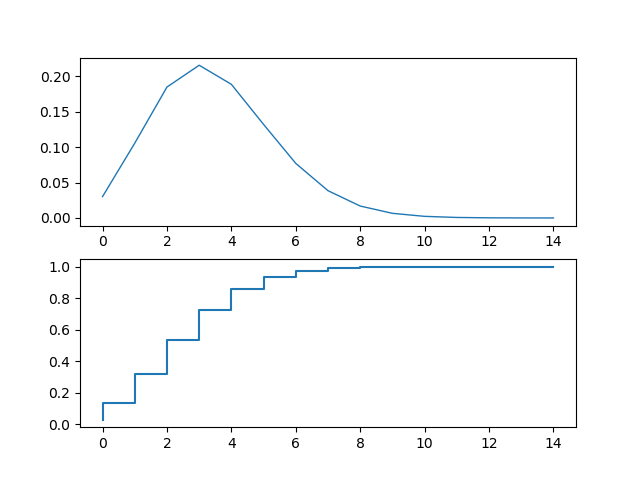

In [46]:
n = np.arange(0,15)

fig, axes = plt.subplots(2,1)

# plot the "probability mass function" (PMF)
axes[0].plot(n, X.pmf(n),lw=1,linestyle="-")
# plot the "commulative distribution function" (CDF)
axes[1].step(n, X.cdf(n))

#### Normal distribution

In [47]:
# Create a random variable (continuous) with normal distribution
Y = stats.norm(loc=1.0)

<IPython.core.display.Javascript object>


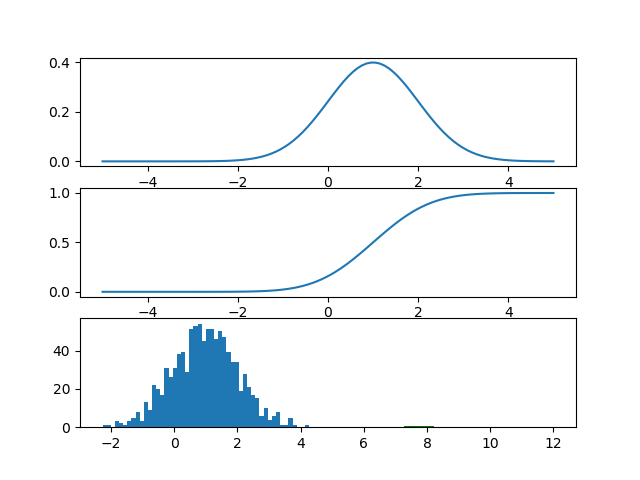

In [48]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1)

# plot the "probability distribution function", PDF
axes[0].plot(x, Y.pdf(x))

# plot the "commulative distributin function", CDF
axes[1].plot(x, Y.cdf(x));

# plot  histogram of 1000 random iterations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [49]:
X.mean(), X.std(), X.var() # Poisson distribution

(3.5, 1.8708286933869707, 3.5)

In [50]:
Y.mean(), Y.std(), Y.var() # normal distribution

(1.0, 1.0, 1.0)

####  Example: Comets and meteorites impact

In [51]:
# Data with diameters in km of apocaliptic comets that have impacted Earth in history

data = [7.40, 6.90, 5.20, 6.20, 4.20, 8.10, 9.50, 7.40, 6.80, 7.50, 7.80, 6.60, 6.00, 8.60, 8.0, 7.20, 7.30, 9.00, 9.11, 9.20, 8.20, 10.01, 11.3]


In [47]:
mean, sigma = stats.norm.fit(data)
print(mean)
print(sigma)

7.71826086957
1.55628501965


In [54]:
x = np.linspace(3,12,20)

D = stats.norm(loc='mean', scale = 'sigma')
plt.hist(data,x,color="g", normed=True)
plt.plot(x,D.pdf(x),color='b');


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [55]:
D.mean(), D.std(), D.var()

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'int'

In [49]:
prob_over_10 = 1 - D.cdf(x= 10) 

In [50]:
print(prob_over_10)

0.0713044266215


## Linear regresions

Linear regresions are a simple scientific method that allows to predict a continuous and linear relation between two variables. In the following example we want to obtains the molecular mass of a gas from real data of gas pressure and density. The molecular mass can be simply calculated from the ideal gasses equation as:

\begin{equation}
\mu = \left(\frac{\rho}{P}\right)_{P\rightarrow 0} RT
\end{equation}

where $\rho$ is the gas density. This equation is only valid in the limit $P \rightarrow 0 $. This is why we need to use a linear regresion to extrapolate the data to P=0. Then, we plot the ratio $\rho/P$ vs $P$.

Let's consider the next gas pressures in kPa: 

In [56]:
P = [12.223,25.20,36.97,60.37,85.23,101.3]
P = [float(x)*1000 for x in P] # en Pa⋅⋅
rho = [0.225, 0.456, 0.664, 1.062, 1.468, 1.734]
rho = [float(x)*1000 for x in rho ] # in g/m^3
P_d = []

for i in range(len(P)):
    P_d.append(float(rho[i])/float(P[i]))



Now that we have the data we can visualize them using Matplotlib

<IPython.core.display.Javascript object>


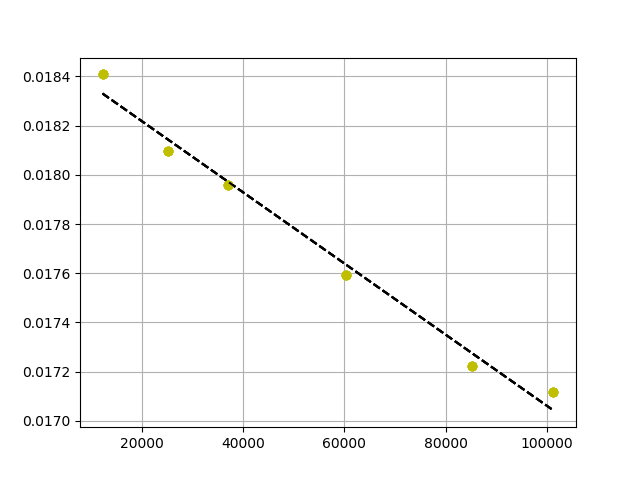

In [58]:
plt.plot(P,P_d, 'yo')

We can do the linear fit using numpy or scipy! 

In [59]:
# Using numpy
fit = np.polyfit(P,P_d,1)
print(fit)

# Using scipy
fit_scipy = stats.linregress(P,P_d)
print(fit_scipy)
slope, intercept, r_value, p_value, std_err = stats.linregress(P,P_d)



[-1.44547568e-08  1.85068087e-02]
LinregressResult(slope=-1.445475684633581e-08, intercept=0.01850680871471868, rvalue=-0.9928586054695316, pvalue=7.631716992796769e-05, stderr=8.684066628950703e-10)


In [63]:
fit_fn = np.poly1d(fit)
plt.plot(P,P_d, 'yo', P, fit_fn(P), '--k')
plt.grid(True)
plt.show()

R = str(round(r_value,4))
m = str(round(slope,4))
t = str(round(intercept,4))

R = 8.314
T = 298.15

Mu = R*T*intercept

print("The molar mass is: "+str(Mu)+ " g/mol")

The molar mass is: 45.875030922091106 g/mol
